# Advanced Visualization

A couple of different visualization libraries in this notebook. Starting w/ `altair`, running through some `matplotlib`, hitting `bqplot`, and ending with `ipyvolume`.

## Altair

In [ ]:
# uncomment the line below and run the cell, then run the cell again to get altair tooltip.
# %load ../scripts/altair-example.py

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl

### Note

Using cleaned data from [Data Cleaning](Data%20Cleaning.ipynb) Notebook. See Notebook for details.

In [2]:
df = pd.read_csv("../data/coal_prod_cleaned.csv")

In [3]:
df.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,103295,18.0,Independent Producer Operator,39175.0,Appalachia Southern,Bibb,Seymour Mine,Alabama,Active,Surface,Hope Coal Company Inc,"P.O. Box 249, Maylene, AL 35114",Mine only,105082.0,NaN,2008
1,103117,19.0,Operating Subsidiary,29926.0,Appalachia Southern,Cullman,"Mine #2, #3, #4",Alabama,"Active, men working, not producing",Surface,Twin Pines Coal Company Inc,"1874 County Road 15, Bremen, AL 35033",Mine only,10419.0,NaN,2008
2,103361,20.0,Operating Subsidiary,42542.0,Appalachia Southern,Cullman,Cold Springs West Mine,Alabama,Active,Surface,Twin Pines Coal Company,"74 Industrial Parkway, Jasper, AL 35502",Mine only,143208.0,NaN,2008
3,100759,395.0,Operating Subsidiary,890710.0,Appalachia Southern,Fayette,North River # 1 Underground Mi,Alabama,Active,Underground,Chevron Mining Inc,"3114 County Road 63 S, Berry, AL 35546",Mine and Preparation Plant,2923261.0,United Mine Workers of America,2008
4,103246,22.0,Independent Producer Operator,55403.0,Appalachia Southern,Franklin,Bear Creek,Alabama,Active,Surface,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",Mine only,183137.0,NaN,2008


In [4]:
colors = sns.color_palette(n_colors=df.Year.nunique())

In [6]:
color_dict = dict(zip(sorted(df.Year.unique()), colors))
color_dict

{2008: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 2009: (1.0, 0.4980392156862745, 0.054901960784313725),
 2010: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 2011: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 2012: (0.5803921568627451, 0.403921568627451, 0.7411764705882353)}

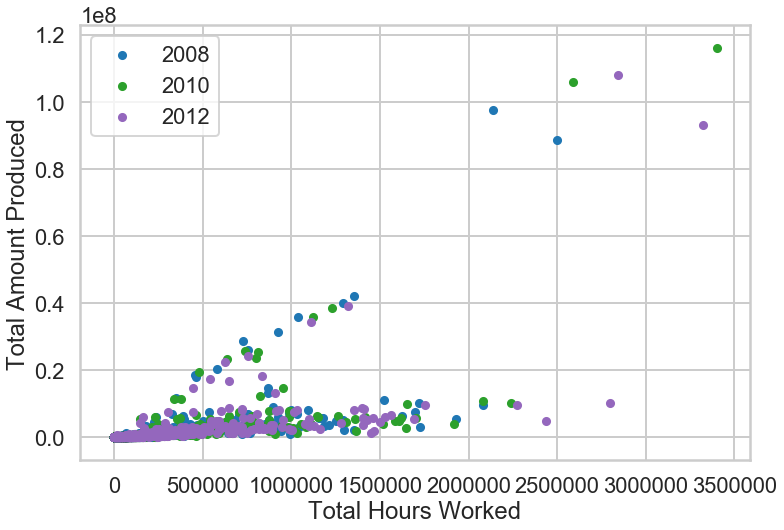

In [18]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
plt.savefig("../ex1.png")

In [20]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [21]:
mpl.style.use('seaborn-colorblind')

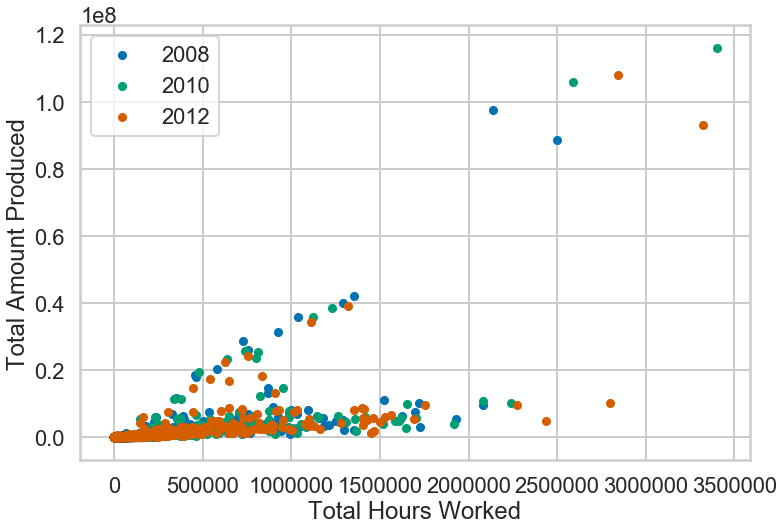

In [22]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
#                 c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend();
# plt.savefig("ex1.png")

In [23]:
df_dict = load_boston()
features = pd.DataFrame(data=df_dict.data, columns = df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target, columns = ['MEDV'])
df = pd.concat([features, target], axis=1)

In [24]:
df['Zone'] = df['ZN'].astype('category')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Zone
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,18.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0


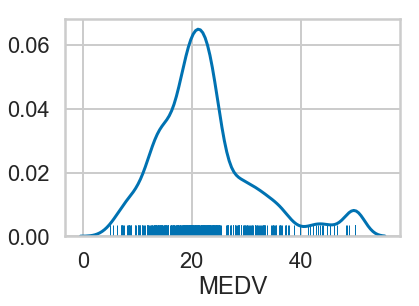

In [25]:
# Target variable
fig, ax = plt.subplots(figsize=(6, 4))
sns.distplot(df.MEDV, ax=ax, rug=True, hist=False);

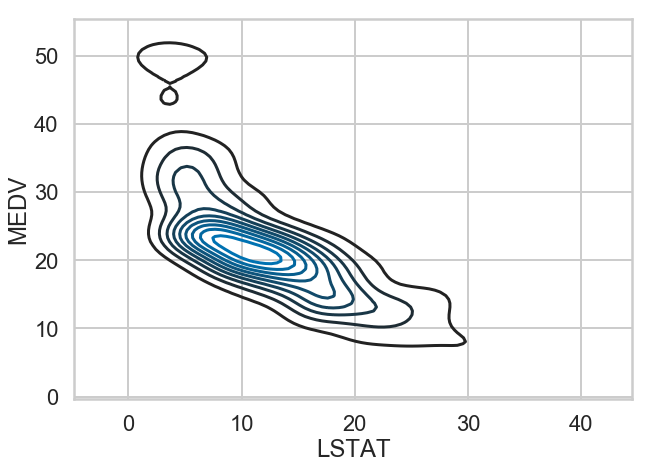

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.LSTAT,
            df.MEDV,
            ax=ax);

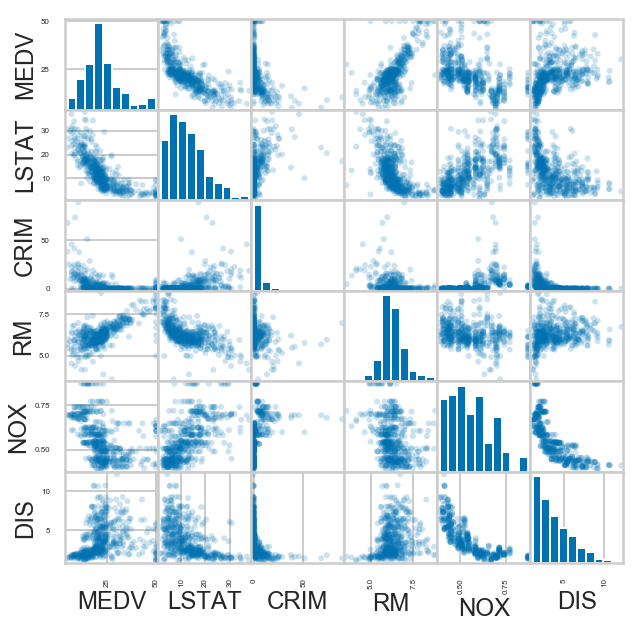

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(df[['MEDV', 'LSTAT', 'CRIM', 'RM', 'NOX', 'DIS']], alpha=0.2, diagonal='hist', ax=ax);

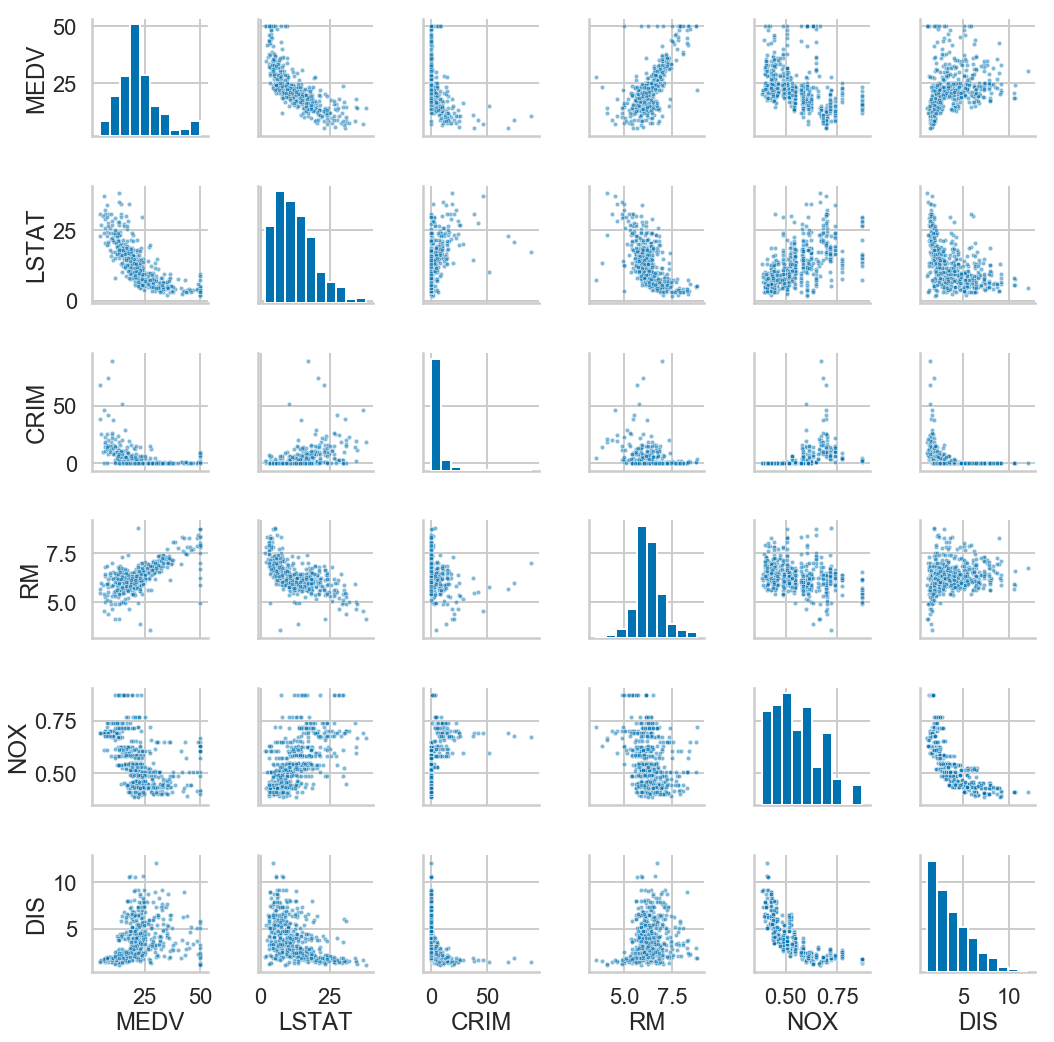

In [28]:
# fig, ax = plt.subplots(figsize=(10, 10))
sns.pairplot(data=df, 
             vars=['MEDV', 'LSTAT', 'CRIM', 'RM', 'NOX', 'DIS'],
             plot_kws={'s':20, 'alpha':0.5},
            );


## Quantile cuts 

In [ ]:
players = pd.read_csv("../data/raw_players.csv.gz", compression='gzip')

In [ ]:
players.head()

In [ ]:
weight_categories = ["vlow_weight",
                     "low_weight",
                     "mid_weight",
                     "high_weight",
                     "vhigh_weight",
                    ]

players['weightclass'] = pd.qcut(players['weight'],
                                 len(weight_categories),
                                 weight_categories)

In [ ]:
players.head()

# BQPlot

Examples here are shamelessly stolen from the amazing: https://github.com/maartenbreddels/jupytercon-2017/blob/master/jupytercon2017-widgets.ipynb

In [29]:
from IPython.display import YouTubeVideo

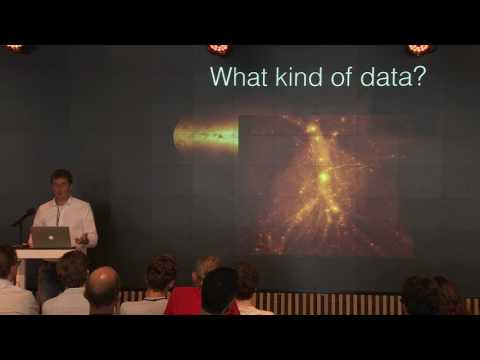

In [30]:
YouTubeVideo("uHPcshgTotE", width=560, height=315)

In [31]:
# mixed feelings about this import
import bqplot.pyplot as plt
import numpy as np

In [32]:
x = np.linspace(0, 2, 50)
y = x**2

In [33]:
fig = plt.figure()
scatter = plt.scatter(x, y)
plt.show()

In [35]:
fig.animation_duration = 500
scatter.y = x**.5 + 2

In [36]:
scatter.selected_style = {'stroke':'red', 'fill': 'orange'}
plt.brush_selector();

In [37]:
scatter.selected

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [38]:
scatter.selected = [1,2,10,40]

## ipyvolume

In [7]:
import ipyvolume as ipv

In [8]:
N = 1000
x, y, z = np.random.random((3, N))

In [10]:
fig = ipv.figure()
scatter = ipv.scatter(x, y, z, marker='box')
ipv.show()

In [11]:
scatter.x = scatter.x + 0.5

In [12]:
scatter.x = x - .25

In [13]:
scatter.color = "green"
scatter.size = 5

In [14]:
scatter.color = np.random.random((N,3))

In [15]:
scatter.size = 2

In [16]:
ex = ipv.datasets.animated_stream.fetch().data

In [17]:
ex.shape

(6, 200, 1250)

In [18]:
ex[:, ::, ::4].shape

(6, 200, 313)

In [19]:
ipv.figure()
ipv.style.use('dark')
quiver = ipv.quiver(*ipv.datasets.animated_stream.fetch().data[:,::,::4], size=5)
ipv.animation_control(quiver, interval=200)
ipv.show()
ipv.style.use('light')

In [23]:
quiver.geo = "cat"

In [34]:
N = 1000*1000
x, y, z = np.random.random((3, N)).astype('f4')

In [35]:
ipv.figure()
s = ipv.scatter(x, y, z, size=0.2)
ipv.show()

In [31]:
ipv.save("3d-example-plot.html")

In [33]:
# I don't know why this doesn't work. It may *just work* for you.
!open 3d-example-plot.html